# Object Detection

Tensorflow

SSD: Single Shot MultiBox Detector (1-stage detector)

Liu, Wei, et al. "Ssd: Single shot multibox detector." ECCV 2016.

In [1]:
!pip install tensorflow tensorflow-hub matplotlib

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [3]:
MODEL_URL = "https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2"
detector = hub.load(MODEL_URL)


In [6]:
!wget -q "https://images.unsplash.com/photo-1636217255573-5f7eafa833f4?auto=format&fit=crop&w=2000&q=80" -O motocycle.jpg
!wget -q "https://images.unsplash.com/photo-1679022586098-766dbfecf22c?auto=format&fit=crop&w=2000&q=80" -O asia.jpg
!wget -q "https://images.unsplash.com/photo-1520880867055-1e30d1cb001c?auto=format&fit=crop&w=2000&q=80" -O peaple.jpg
!wget -q "https://images.unsplash.com/photo-1493238792000-8113da705763?auto=format&fit=crop&w=2000&q=80" -O car_street.jpg
!wget -q "https://images.unsplash.com/photo-1500048993953-d23a436266cf?auto=format&fit=crop&w=2000&q=80" -O human.jpg
!wget -q "https://images.unsplash.com/photo-1502877338535-766e1452684a?auto=format&fit=crop&w=2000&q=80" -O car_building.jpg
!wget -q "https://images.unsplash.com/photo-1470770841072-f978cf4d019e?auto=format&fit=crop&w=2000&q=800" -O house.jpg

In [4]:
!wget -q "https://images.unsplash.com/photo-1636217255573-5f7eafa833f4?auto=format&fit=crop&w=2000&q=80" -O road.jpg
image_path = "road.jpg"


In [5]:
image = Image.open(image_path)
image_np = np.array(image)

# 모델 입력은 float32, [1, H, W, 3]
input_tensor = tf.convert_to_tensor(image_np, dtype=tf.uint8)
input_tensor = tf.expand_dims(input_tensor, 0)


In [6]:
outputs = detector(input_tensor)

boxes = outputs["detection_boxes"][0].numpy()
scores = outputs["detection_scores"][0].numpy()
classes = outputs["detection_classes"][0].numpy().astype(int)


In [7]:
def draw_boxes(image, boxes, class_names, scores, threshold=0.3):
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    ax = plt.gca()

    h, w, _ = image.shape

    for i in range(len(boxes)):
        if scores[i] < threshold:
            continue

        y1, x1, y2, x2 = boxes[i]
        x1, x2 = x1 * w, x2 * w
        y1, y2 = y1 * h, y2 * h

        rect = plt.Rectangle((x1, y1),
                             x2 - x1,
                             y2 - y1,
                             fill=False,
                             color='red',
                             linewidth=2)
        ax.add_patch(rect)
        ax.text(x1, y1,
                f"{class_names[classes[i]]}: {scores[i]:.2f}",
                color='yellow',
                fontsize=10)
    plt.axis("off")
    plt.show()


In [8]:
labels_path = tf.keras.utils.get_file(
    'coco_labels.txt',
    'https://raw.githubusercontent.com/amikelive/coco-labels/master/coco-labels-paper.txt'
)
class_names = open(labels_path).read().splitlines()


702/702 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


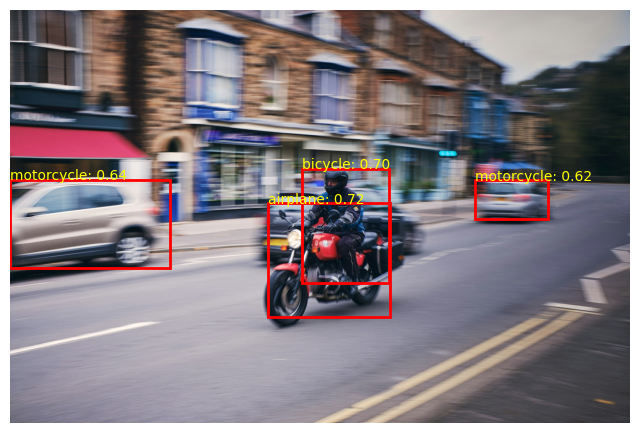

In [11]:
draw_boxes(image_np, boxes, class_names, scores, threshold=0.4)
#draw_boxes(image_np, boxes, class_names, scores, threshold=0.6)


In [12]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.4 MB/s eta 0:00:00


Pytorch

YOLOv8 (very recent 1-stage detector)

Varghese, Rejin, and M. Sambath. "Yolov8: A novel object detection algorithm with enhanced performance and robustness." 2024 International conference on advances in data engineering and intelligent computing systems (ADICS). IEEE, 2024.

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /content/road.jpg: 448x640 1 person, 4 cars, 1 motorcycle, 44.1ms
Speed: 10.0ms preprocess, 44.1ms inference, 6.7ms postprocess per image at shape (1, 3, 448, 640)


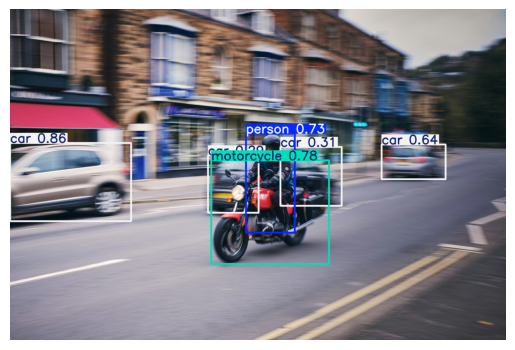

In [13]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")

results = model("road.jpg")
plt.imshow(results[0].plot()[..., ::-1])
plt.axis("off")
plt.show()


Faster-RCNN

Ren, Shaoqing, et al. "Faster r-cnn: Towards real-time object detection with region proposal networks." NeurIPS 2015.

In [14]:
import torch
import torchvision
from torchvision.transforms import functional as F
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


In [15]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard',
    'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard',
    'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork',
    'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange',
    'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair',
    'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv',
    'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave',
    'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase',
    'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]


In [16]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


100%|██████████| 160M/160M [00:00<00:00, 175MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [17]:
image_path = "road.jpg"

In [18]:
image = Image.open(image_path).convert("RGB")
img_tensor = F.to_tensor(image)


In [19]:
with torch.no_grad():
    outputs = model([img_tensor])[0]


In [20]:
def plot_image_with_boxes(img, boxes, labels, scores, threshold=0.5):
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    ax = plt.gca()

    for box, label, score in zip(boxes, labels, scores):
        if score < threshold:
            continue

        x1, y1, x2, y2 = box
        rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1,
                             fill=False, color='red', linewidth=2)
        ax.add_patch(rect)
        ax.text(x1, y1,
                f"{COCO_INSTANCE_CATEGORY_NAMES[label]}: {score:.2f}",
                color='yellow', fontsize=10, backgroundcolor="black")

    plt.axis("off")
    plt.show()


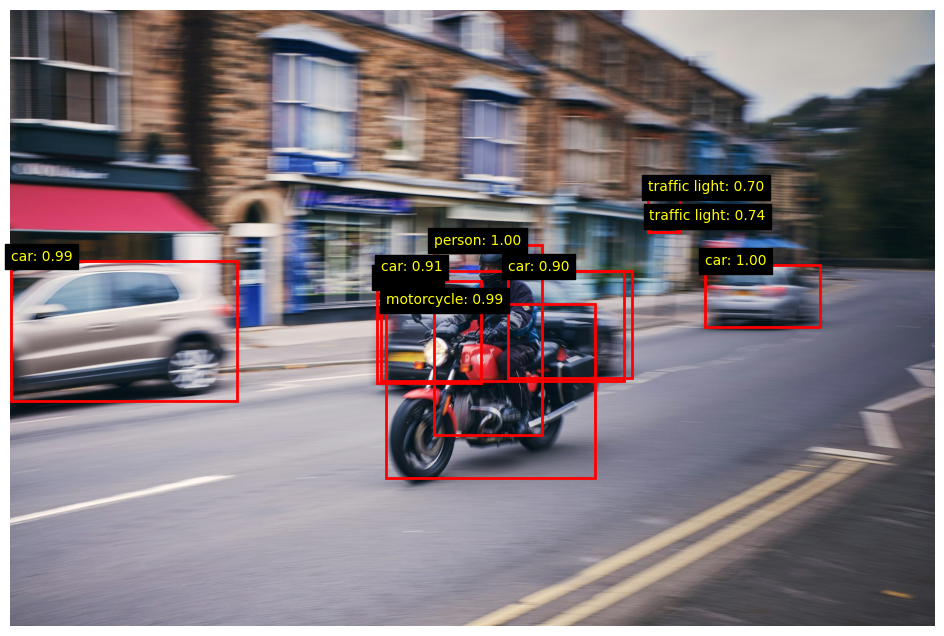

In [21]:
plot_image_with_boxes(
    np.array(image),
    outputs["boxes"].numpy(),
    outputs["labels"].numpy(),
    outputs["scores"].numpy(),
    threshold=0.5
)


**아래의 다양한 이미지 URL을 활용하여 객체 탐지기들의 결과를 비교해 보자!**

*   야간 오토바이 도로: https://images.unsplash.com/photo-1749389281351-35212b0bea0e?auto=format&fit=crop&w=2000&q=80
* 혼잡한 아시아 거리: https://images.unsplash.com/photo-1679022586098-766dbfecf22c?auto=format&fit=crop&w=2000&q=80
* 산 위의 사람들: https://images.unsplash.com/photo-1520880867055-1e30d1cb001c?auto=format&fit=crop&w=2000&q=80
* 도로 위 자동차: https://images.unsplash.com/photo-1493238792000-8113da705763?auto=format&fit=crop&w=2000&q=80
* 사람: https://images.unsplash.com/photo-1500048993953-d23a436266cf?auto=format&fit=crop&w=2000&q=80
* 건물 앞 자동차: https://images.unsplash.com/photo-1502877338535-766e1452684a?auto=format&fit=crop&w=2000&q=80
* 강 위의 집: https://images.unsplash.com/photo-1470770841072-f978cf4d019e?auto=format&fit=crop&w=2000&q=80


# NMS (Non Maximum Suppression)

In [22]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt


In [23]:
# format: [x1, y1, x2, y2]
boxes = torch.tensor([
    [50, 50, 200, 200],   # 박스 A
    [60, 60, 210, 210],   # 박스 B (A와 크게 겹침)
    [55, 70, 205, 220],   # 박스 C (A/B와 겹침)
    [300, 100, 450, 250], # 박스 D (완전 다른 객체)
], dtype=torch.float32)

scores = torch.tensor([0.9, 0.75, 0.6, 0.95])  # confidence


In [24]:
# IoU threshold = 0.5
keep = torchvision.ops.nms(boxes, scores, iou_threshold=0.5)
keep


tensor([3, 0])

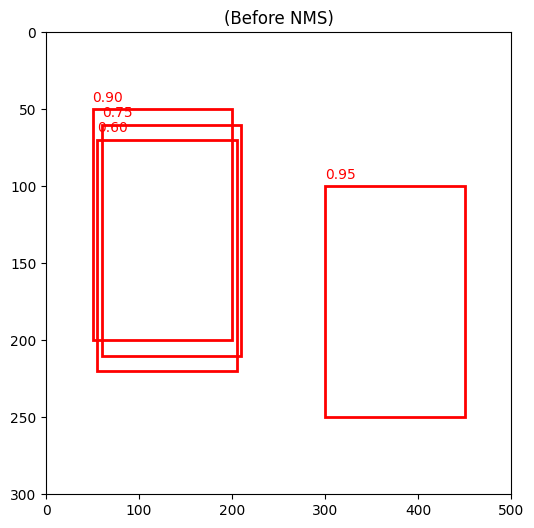

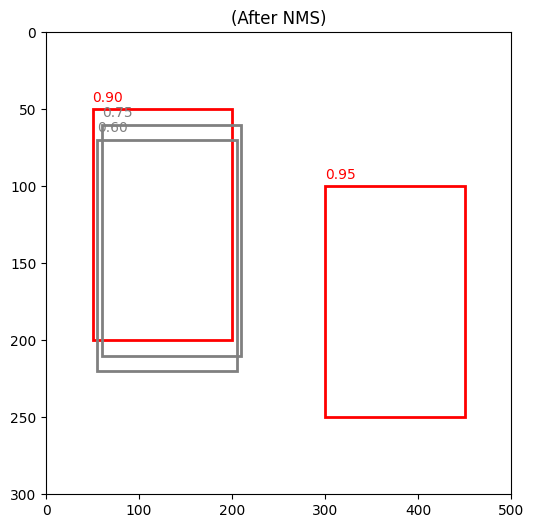

In [25]:
def plot_boxes(boxes, scores, kept=None, title=""):
    plt.figure(figsize=(6,6))
    plt.xlim(0, 500); plt.ylim(0, 300)
    plt.gca().invert_yaxis()
    plt.title(title)

    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = box
        color = "red" if kept is None or i in kept else "gray"

        plt.gca().add_patch(
            plt.Rectangle((x1, y1), x2-x1, y2-y1,
                          fill=False, edgecolor=color, linewidth=2)
        )
        plt.text(x1, y1-5, f"{scores[i]:.2f}", color=color)

    plt.show()

plot_boxes(boxes, scores, title="(Before NMS)")
plot_boxes(boxes, scores, kept=keep, title="(After NMS)")


In [26]:
import torchvision
import torch
from PIL import Image
from torchvision.transforms import functional as F

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [27]:
!wget -q "https://images.unsplash.com/photo-1749389281351-35212b0bea0e?auto=format&fit=crop&w=2000&q=80" -O road.jpg
image = Image.open("road.jpg").convert("RGB")

img_tensor = F.to_tensor(image)


In [28]:
with torch.no_grad():
    outputs = model([img_tensor])[0]

boxes = outputs["boxes"]
scores = outputs["scores"]
labels = outputs["labels"]


In [29]:
nms_idx = torchvision.ops.nms(boxes, scores, iou_threshold=0.3)

boxes_nms = boxes[nms_idx]
scores_nms = scores[nms_idx]
labels_nms = labels[nms_idx]


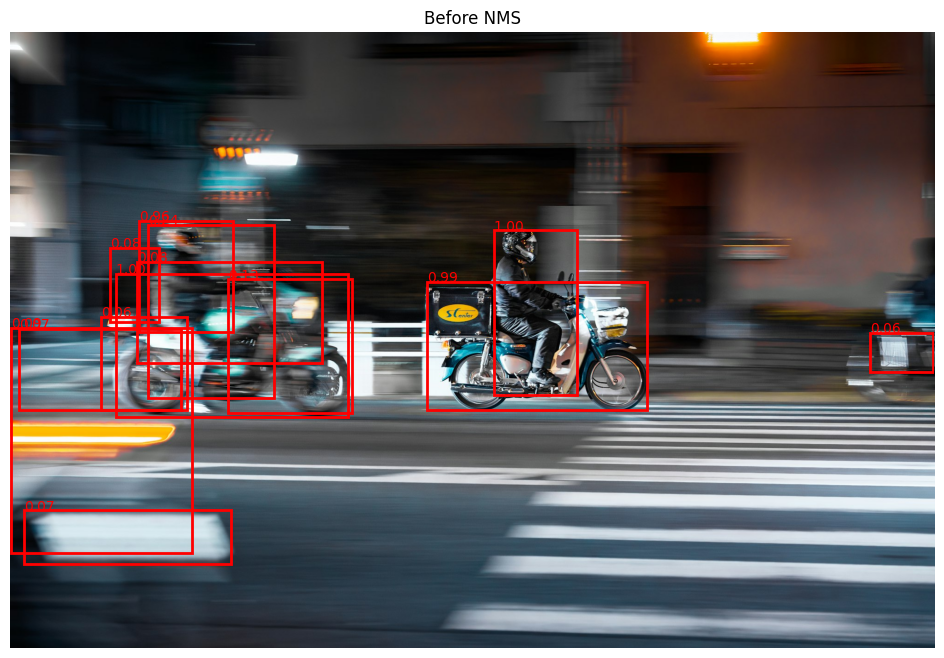

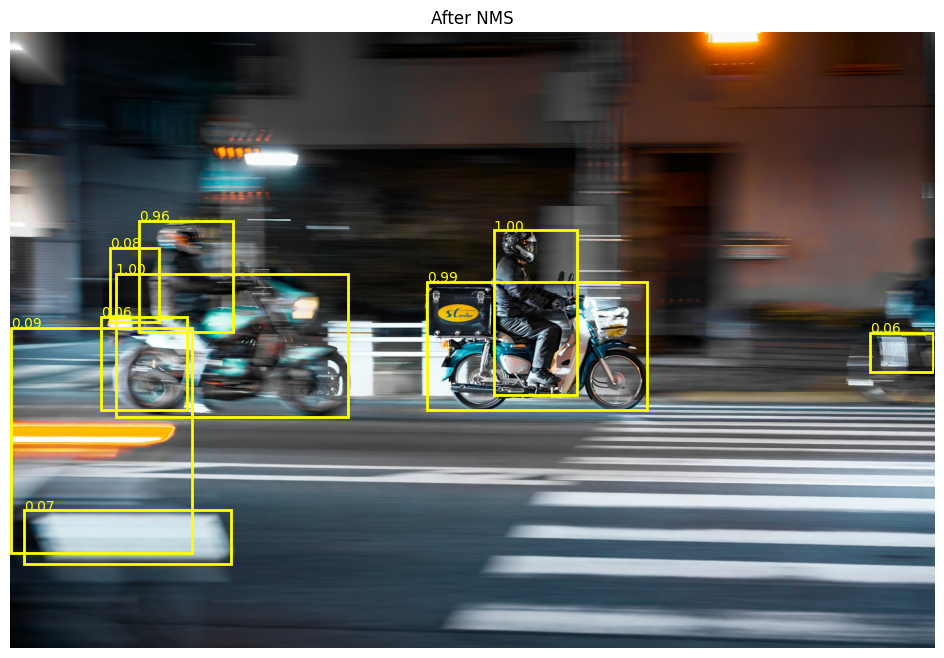

In [30]:
import matplotlib.pyplot as plt
import numpy as np

def visualize(img, boxes, scores, color="red", title=""):
    plt.figure(figsize=(12,8))
    plt.imshow(img)
    ax = plt.gca()

    for box, score in zip(boxes, scores):
        x1, y1, x2, y2 = box
        rect = plt.Rectangle((x1, y1), x2-x1, y2-y1,
                             fill=False, edgecolor=color, linewidth=2)
        ax.add_patch(rect)
        ax.text(x1, y1, f"{score:.2f}", color=color, fontsize=10)

    plt.title(title)
    plt.axis("off")
    plt.show()

visualize(image, boxes, scores, title="Before NMS")
visualize(image, boxes_nms, scores_nms, color="yellow", title="After NMS")
